In [1]:
from vis.utils import utils
from keras.models import load_model
from keras import activations
from matplotlib import pyplot as plt
%matplotlib inline
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations
from keras.preprocessing.image import list_pictures, load_img, img_to_array
import numpy as np

Using TensorFlow backend.


In [2]:
nb_images = 5

### モデルの読み込み

In [3]:
linear_model = load_model('./food/model3.h5')
linear_model.load_weights('./food/finetuning3.h5')
pred_model = load_model('./food/model3.h5')
pred_model.load_weights('./food/finetuning3.h5')

In [8]:
classes= np.array(['donuts',
 'spaghetti_carbonara',
 'omelette',
 'ceviche',
 'pho',
 'bibimbap',
 'churros',
 'caesar_salad',
 'lasagna',
 'hot_dog',
 'creme_brulee',
 'fried_calamari',
 'paella',
 'prime_rib',
 'sushi'])

### 最終レイヤーを差し替え

In [9]:
linear_model.layers[-1].activation = activations.linear
linear_model = utils.apply_modifications(linear_model)

### 画像の読み込み

In [26]:
X = []
labels = []
predict_dir = './food/visualization'
for picture in list_pictures(predict_dir):
        img = load_img(picture, target_size=(200, 200))
        img = img.resize((128, 128))
        img = img_to_array(img)
        X.append(img)
        labels.append(picture.split('/')[3].split('.')[0])
X = X[:nb_images]
labels = labels[:nb_images]

label_index_list = []
for i, l in enumerate(labels):
    for j, t in enumerate(classes):
        if t == l:
            label_index_list.append(j)
            

### ヒートマップを描画

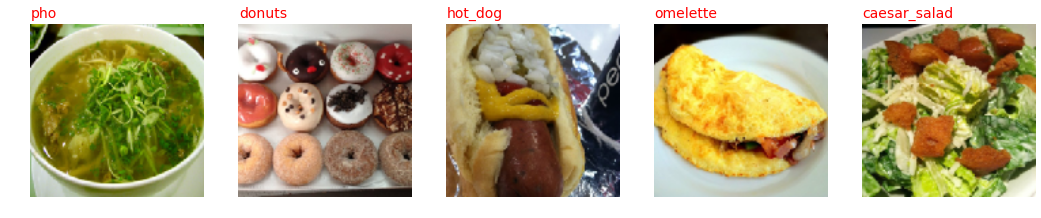

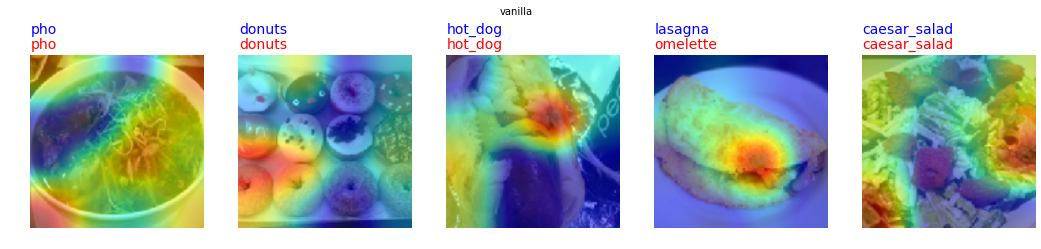

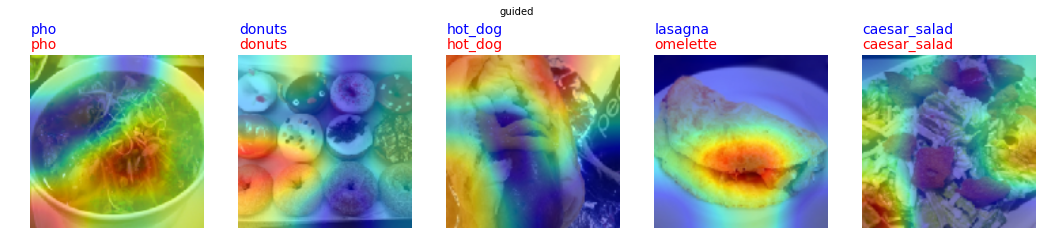

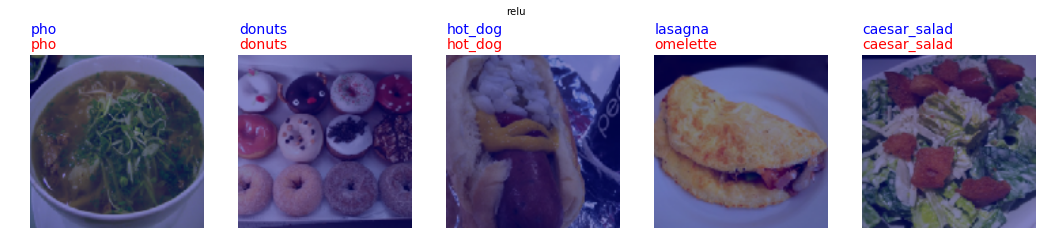

In [27]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam

plt.figure()
f, ax = plt.subplots(1, nb_images, figsize=(18, 4))
for i, (img, label) in enumerate(zip(X, label_index_list)):    
    ax[i].axis('off')
    ax[i].imshow(img/255.0)
    ax[i].text(0, -5, classes[label], fontsize=14, color='red')

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, nb_images, figsize=(18, 4))
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, (img, label) in enumerate(zip(X, label_index_list)):    
        grads = visualize_cam(linear_model, -1, filter_indices=label, 
                              seed_input=img, backprop_modifier=modifier)
        jet_heatmap = np.uint8(grads)

        # 予測値
        pred = pred_model.predict(img[np.newaxis,:,:,:])[0].argmax()
        
        ax[i].axis('off')
        ax[i].imshow(overlay(jet_heatmap, img))
        ax[i].text(0, -5, classes[label], fontsize=14, color='red')
        ax[i].text(0, -16, classes[pred], fontsize=14, color='blue')